# **Project Title: Credit Risk Analysis For Loan Default**

# **Author:** Okoiti Patrice


## **1.0 Business Understanding**

In the financial services industry, credit risk represents one of the most critical areas of concern for banks and lending institutions. The loan defaults can significantly impact a financial institution's profitability and stability. With growing access to personal financial and demographic data, banks have an opportunity to leverage data-driven approaches to better assess creditworthiness and reduce default rates. This project aims to analyze historical loan data to identify factors associated with loan defaults and build a predictive model to improve credit risk assessment. By doing so, the institution can strengthen its lending strategies, minimize losses, and ensure better portfolio health..

## **1.1 Challenges**

Key challenges include:

- Understanding the profile of borrowers who are likely to default.
- Determining how demographic features (age, gender, education) and loan purpose correlate with credit risk.
- Identifying which variables most influence loan default.
- Developing a robust and interpretable classification model with high predictive accuracy of atleast 80%.
- Balancing predictive performance with regulatory and ethical considerations such as fairness and explainability.

## **1.2 Proposed Solution**

Conduct a comprehensive analysis of historical bank loan data to:
- Explore and visualize differences in demographic and loan characteristics between good (non-defaulting) and bad (defaulting) loans.
- Examine the relationship between interest rates and loan defaults to understand how pricing might reflect or influence credit risk.
- Apply feature selection and machine learning techniques to identify key predictors of default.
- Train and evaluate multiple classification models, selecting the best-performing one based on accuracy, precision, recall, and AUC-ROC metrics.
- Provide actionable insights and recommendations for improving credit risk assessment policies.



## **1.3 Conclusion**

By leveraging credit data, banks can proactively identify high-risk borrowers, price loans more appropriately, and improve approval decisions. This project will help develop a predictive model and provide strategic recommendations that reduce default rates and optimize loan portfolio performance, ensuring more secure and data-informed lending practices.

## **1.4 Problem Statement**

Mambo Leo commercial bank seeks to improve its ability to assess the creditworthiness of loan applicants to reduce default risk. The current risk assessment process is insufficient and relies heavily on manual checks and scoring models. The bank wants to use historical loan data to identify key risk indicators and build a predictive model that can accurately classify applicants as likely to default or not. 

## **1.5 Objectives**

1. To explore the characteristics of good and bad loans based on borrower demographics (age, gender, education) and loan purpose.
2. To analyze the relationship between interest rates and the likelihood of loan default.
3. To identify the most influential features contributing to credit risk.
4. To build and evaluate a predictive classification model that achieves an accuracy of at least 80% in identifying potential defaulters.

## **2.0 Data Undertanding**

### **2.1 Data Source**
The dataset contains anonymized bank loan applications information from kaggle, https://www.kaggle.com/datasets/udaymalviya/bank-loan-data/data, detailing revelant borrower information and loan performance indicators.

### **2.2 column description**
Key features include:

1. **Demographics**
- `person_age`: Age of the applicant (in years).
- `person_gender`: Gender of the applicant (male, female).
- `person_education`: Educational background (High School, Bachelor, Master, etc.).

2. **Financial**
- `person_income`: Annual income of the applicant (in USD).
- `person_emp_exp`: Years of employment experience.
- `person_home_ownership`: Type of home ownership (RENT, OWN, MORTGAGE).

3. **Loan Details**
- `loan_amnt`: Loan amount requested (in USD).
- `loan_intent`: Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, etc.).
- `loan_int_rate`: Interest rate on the loan (percentage).
- `loan_percent_income`: Ratio of loan amount to income.

4. **Credit History**
- `cb_person_cred_hist_length`: Length of the applicant's credit history (in years).
- `credit_score`: Credit score of the applicant.
- `previous_loan_defaults_on_file`: Whether the applicant has previous loan defaults (Yes or No).

3. **Target Variable**
- `loan_status`: 1 if the loan was repaid successfully, 0 if the applicant defaulted.


### **2.3 Exploratory Data Analysis**

In [41]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import category_encoders as ce

In [3]:
# load the data
data = pd.read_csv("loan_data.csv")
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# Get overall info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Data has no missing values

In [5]:
# summary statistics of the numerical data
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


The data max age is 144, this might be an error.

In [6]:
# filter out categorical columns
cat_cols = data.select_dtypes('object')

# Identify the unique values of each categorical column
for col in cat_cols.columns:
    print(f"{col}: \n{cat_cols[col].unique()}\n")

person_gender: 
['female' 'male']

person_education: 
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_home_ownership: 
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_intent: 
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

previous_loan_defaults_on_file: 
['No' 'Yes']



#### 2.3.1 Distribution of Loan Status

In [7]:
# distribution of target variable
print(data['loan_status'].value_counts(), '\n')
print(round(data['loan_status'].value_counts(normalize=True)*100))

loan_status
0    35000
1    10000
Name: count, dtype: int64 

loan_status
0    78.0
1    22.0
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Loan Status Distribution')

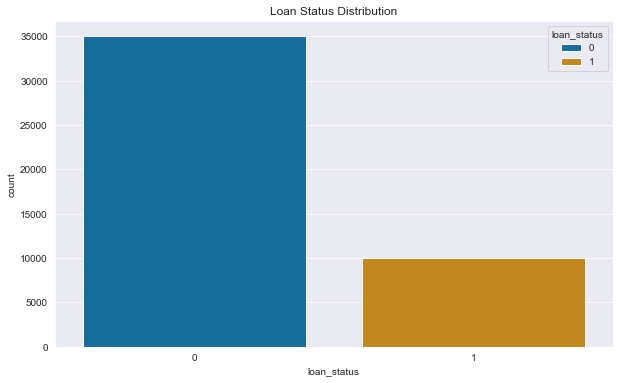

In [47]:
# set grid style
sns.set_style(style='darkgrid')

# plot the loan status distribution count
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='loan_status', hue='loan_status', palette="colorblind")
plt.title('Loan Status Distribution')

The graph above shows the Class imbalance in the target variable

#### 2.3.2 Default Rate by Demographics

,person_gender,loan_status,count,default_rate
1,female,1,4485,0.099667
3,male,1,5515,0.122556


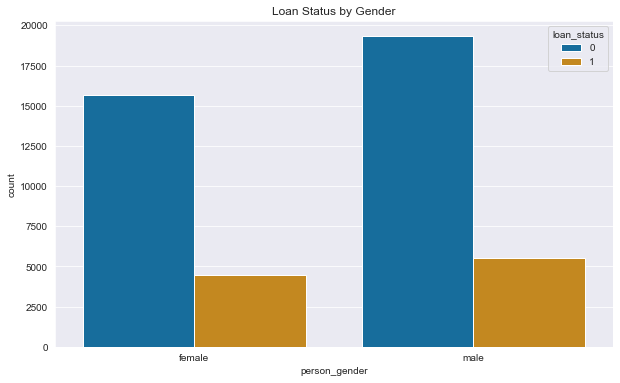

In [46]:
# Create a bar plot for the distribution
age_default_counts = pd.DataFrame(data.groupby('person_gender')['loan_status'].value_counts().reset_index())
# age_default_counts

plt.figure(figsize=(10,6))
sns.barplot(data=age_default_counts, 
            x='person_gender',
            y='count',
            hue='loan_status', 
            palette='colorblind')
plt.title('Loan Status by Gender')

# Default rate by Gender
age_default_counts['default_rate'] = age_default_counts['count']/age_default_counts['count'].sum()
age_default_counts[(age_default_counts['loan_status']==1)].sort_values(by='default_rate')

Even though, their is class imbalance, from the above output, it can be seen that the distribution of default risk is fairly even between the genders, reducing probability of bias towards a certain gender.

,person_education,loan_status,count,default_rate
3,Bachelor,1,3018,0.067067
7,High School,1,2671,0.059356
1,Associate,1,2650,0.058889
9,Master,1,1519,0.033756
5,Doctorate,1,142,0.003156


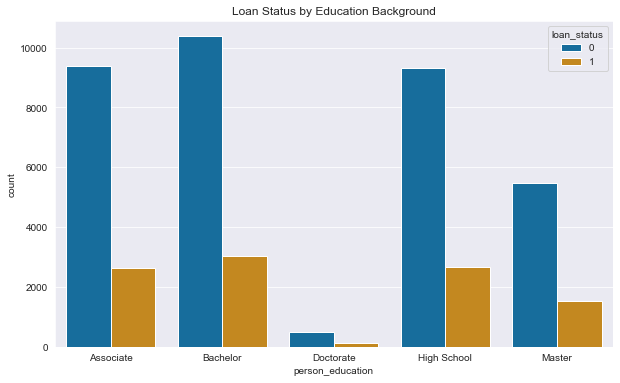

In [44]:
# Create a bar plot for the distribution
edu_default_counts = pd.DataFrame(data.groupby('person_education')['loan_status'].value_counts()).reset_index()
# edu_default_counts

plt.figure(figsize=(10,6))
sns.barplot(data=edu_default_counts, 
            x='person_education', 
            y='count', 
            hue='loan_status', 
            palette='colorblind')
plt.title('Loan Status by Education Background')

# Default rate by Education level
edu_default_counts['default_rate']=edu_default_counts['count']/edu_default_counts['count'].sum()
edu_default_counts[edu_default_counts['loan_status']==1].sort_values(by='default_rate', ascending=False)


From the above output, it can be seen that higher education background correlates with stronger repayment capacity.

#### 2.3.3 Loan Purpose and Risk

,loan_intent,loan_status,count,default_rate
7,MEDICAL,1,2378,0.052844
1,DEBTCONSOLIDATION,1,2163,0.048067
3,EDUCATION,1,1552,0.034489
9,PERSONAL,1,1521,0.033800
5,HOMEIMPROVEMENT,1,1258,0.027956
11,VENTURE,1,1128,0.025067


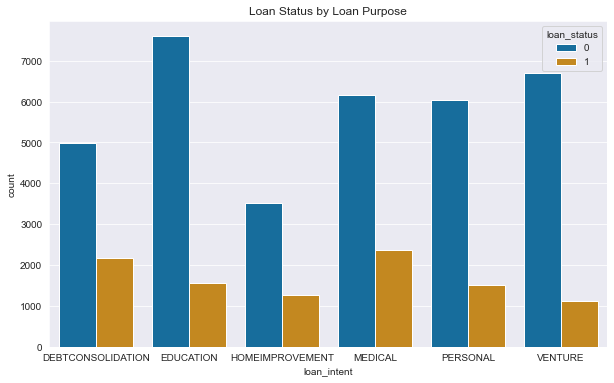

In [45]:
# Default rate by purpose
intent_default_count = pd.DataFrame(data.groupby('loan_intent')['loan_status'].value_counts()).reset_index()
# intent_default_count

# plot the default distribution
plt.figure(figsize=(10,6))
sns.barplot(data=intent_default_count, 
            x='loan_intent',
            y= 'count',
            hue='loan_status',
            palette='colorblind')
plt.title('Loan Status by Loan Purpose')

intent_default_count['default_rate'] = intent_default_count['count']/intent_default_count['count'].sum()
intent_default_count[intent_default_count['loan_status']==1].sort_values(by='default_rate', ascending=False)


Medical loans have the highest default rates.

Text(0.5, 1.0, 'Age Distribution by Loan Status')

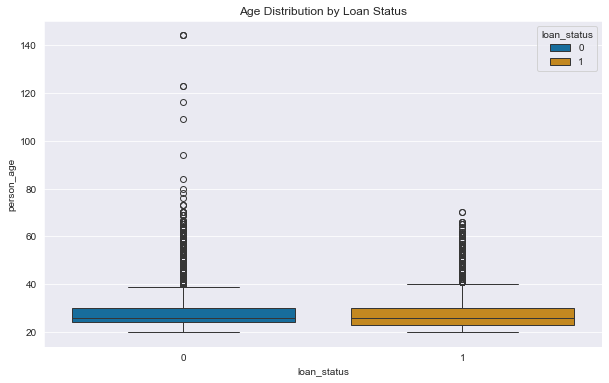

In [48]:
# Default by Age
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='loan_status', 
            y='person_age', 
            hue='loan_status', 
            palette='colorblind')
plt.title('Age Distribution by Loan Status')

Young borrowers tend to have high default rate

#### 2.3.4 Interest Rate vs Default

In [ ]:
# Correlation between loan status and interest rate
data['loan_int_rate'].corr(data['loan_status'])

0.332004647415078

Text(0.5, 1.0, 'Interest Rate by Loan Status')

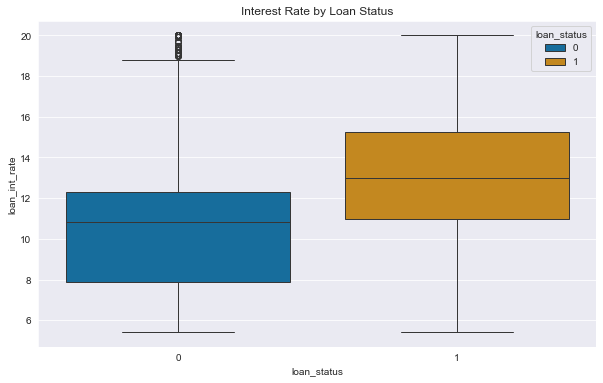

In [49]:
# Interest rate and default
plt.figure(figsize=(10,6))
sns.boxplot(data=data, 
            x='loan_status', 
            y='loan_int_rate',
            hue='loan_status',
            palette='colorblind')
plt.title('Interest Rate by Loan Status')


From the above output, it can be seemn that higher interest rates are assigned to borrowers with high risk of default.

Text(0.5, 1.0, 'Feature Correlation Heatmap')

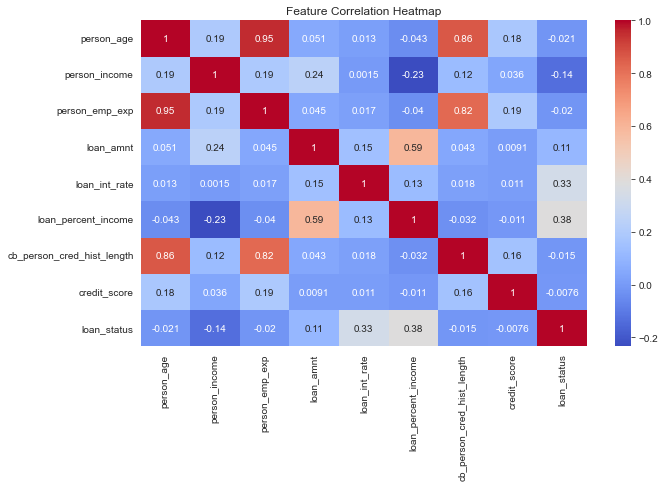

In [50]:
num_cols = data.select_dtypes('number')

# Numerical Features Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')


Key insights from the above output:
- Loan amount, interest rate and percentage of income show some relationship with loan_status.
- There exists strong multicollinearity between age, employment experience, and credit history length.
- Credit score appears relatively independent of other factors in this dataset.

In [51]:
# # Analyze the distributions of the features against each feature
# plt.figure(figsize=(10,6))
# sns.pairplot(data=data, corner=True, hue='loan_status')

## **3.0 Data Preparation**